<a href="https://colab.research.google.com/github/YashWasnik7/2022Spring_Finals/blob/main/vaccine_hesitancy_us.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 Vaccine Hesitancy Analysis in the US

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the required libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the CDC data for vaccine hesitancy in the US:

In [3]:
cdc_data = pd.read_csv("/content/drive/MyDrive/PR_finals/usa_data.csv")
# please comment the above line and uncomment the following line before running
#cdc_data = pd.read_csv("usa_data.csv")

In [4]:
cdc_data.head()

,FIPS Code,County Name,State,Estimated hesitant,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,Percent adults fully vaccinated against COVID-19,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Geographical Point,State Code,County Boundary,State Boundary
0,1131,"Wilcox County, Alabama",ALABAMA,0.23,0.11,0.93,Very High Concern,0.94,Very High Concern,0.228,0.0053,0.0009,0.0003,0.6938,0.0000,0.2684,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.52534299999999 32.132773, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
1,1129,"Washington County, Alabama",ALABAMA,0.23,0.11,0.73,High Concern,0.82,Very High Concern,0.192,0.0146,0.0731,0.0025,0.2354,0.0000,0.6495,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-88.45317899999999 31.505388, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
2,1133,"Winston County, Alabama",ALABAMA,0.22,0.11,0.70,High Concern,0.80,High Concern,0.085,0.0315,0.0034,0.0016,0.0073,0.0005,0.9370,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.63656399999999 34.120908, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
3,1127,"Walker County, Alabama",ALABAMA,0.23,0.11,0.75,High Concern,0.68,High Concern,0.158,0.0249,0.0015,0.0049,0.0617,0.0000,0.8895,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.56108499999999 33.868713, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
4,2013,"Aleutians East Borough, Alaska",ALASKA,0.26,0.12,0.58,Moderate Concern,0.87,Very High Concern,0.195,0.0901,0.4588,0.1968,0.0322,0.0100,0.1321,POINT (-151.631889 63.631126),AK,"MULTIPOLYGON (((-165.036163 54.576598, -165.01...","MULTIPOLYGON (((-165.254162 60.917108, -165.30..."


In [5]:
def cdc_data_prep(data: pd.DataFrame) -> pd.DataFrame:
  """
  The function takes the CDC data and processes it by dropping, renaming, grouping,
  and scaling columns on a state level.
  :param data: CDC hesitancy dataset
  """
  # dropping irrelevant columns
  data = data.drop(['Geographical Point', 'County Boundary', 'State Boundary'], 1)

  # renaming the columns
  data = data.rename(columns = {'Estimated hesitant': 'low hesitancy', 'Estimated strongly hesitant': 'high hesitancy',
                             'Social Vulnerability Index (SVI)': 'svi', 'CVAC level of concern for vaccination rollout': 'cvac',
                             'Percent adults fully vaccinated against COVID-19': 'fully vaccinated', 'Percent Hispanic': 'hispanic',
                              'Percent non-Hispanic American Indian/Alaska Native': 'native', 'Percent non-Hispanic Asian': 'asian',
                              'Percent non-Hispanic Black': 'black', 'Percent non-Hispanic Native Hawaiian/Pacific Islander': 'pacific',
                              'Percent non-Hispanic White': 'white'})
  
  # grouping the county level data to state level
  statewise_df = data.groupby("State")["State Code", "State", "low hesitancy", "high hesitancy", "svi",
                                     "cvac", "fully vaccinated", "hispanic", "native", 
                                     "asian", "black", "pacific", "white"].mean()

  # scaling the dataframe
  statewise_df['low hesitancy'] = (statewise_df['low hesitancy'] - statewise_df['low hesitancy'].min())/(statewise_df['low hesitancy'].max() - statewise_df['low hesitancy'].min())
  statewise_df['high hesitancy'] = (statewise_df['high hesitancy'] - statewise_df['high hesitancy'].min())/(statewise_df['high hesitancy'].max() - statewise_df['high hesitancy'].min())
  statewise_df['fully vaccinated'] = (statewise_df['fully vaccinated'] - statewise_df['fully vaccinated'].min())/(statewise_df['fully vaccinated'].max() - statewise_df['fully vaccinated'].min())
  statewise_df['svi'] = (statewise_df['svi'] - statewise_df['svi'].min())/(statewise_df['svi'].max() - statewise_df['svi'].min())
  statewise_df['cvac'] = (statewise_df['cvac'] - statewise_df['cvac'].min())/(statewise_df['cvac'].max() - statewise_df['cvac'].min())

  return statewise_df


In [6]:
cdc_statewise = cdc_data_prep(cdc_data)
cdc_statewise.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,low hesitancy,high hesitancy,svi,cvac,fully vaccinated,hispanic,native,asian,black,pacific,white
State,,,,,,,,,,,
ALABAMA,0.649809,0.486520,0.790214,0.794420,0.271611,0.034864,0.005749,0.007072,0.287355,0.000269,0.648376
ALASKA,0.706740,0.479488,0.581692,0.822030,1.000000,0.053148,0.324583,0.053886,0.013293,0.005324,0.478703
ARIZONA,0.517604,0.540161,1.000000,1.000000,0.644843,0.313380,0.133180,0.013267,0.018427,0.001180,0.501993
ARKANSAS,0.618342,0.626682,0.811257,0.708926,0.267845,0.052561,0.005515,0.006661,0.160659,0.001171,0.751871
CALIFORNIA,0.213749,0.102967,0.687740,0.695850,0.408423,0.306224,0.017743,0.073066,0.029845,0.002805,0.537445


In [7]:
def cdc_data_plot(df: pd.DataFrame, col: str, title: str)-> None:
  """
  The function plots the percentage of fully vaccinated people in a state
  against the column given as input.
  :param df: statewise processed CDC dataset
  :param col: column which is to be plotted against percentage population fully vaccinated
  :param title: title of the plot
  """
  plot_title = title
  df[[col,'fully vaccinated']].sort_values(col).plot(title = plot_title, kind = 'bar', figsize=(20,5))

Estimated hesitant vs percentage of  fully vaccinated people per state:

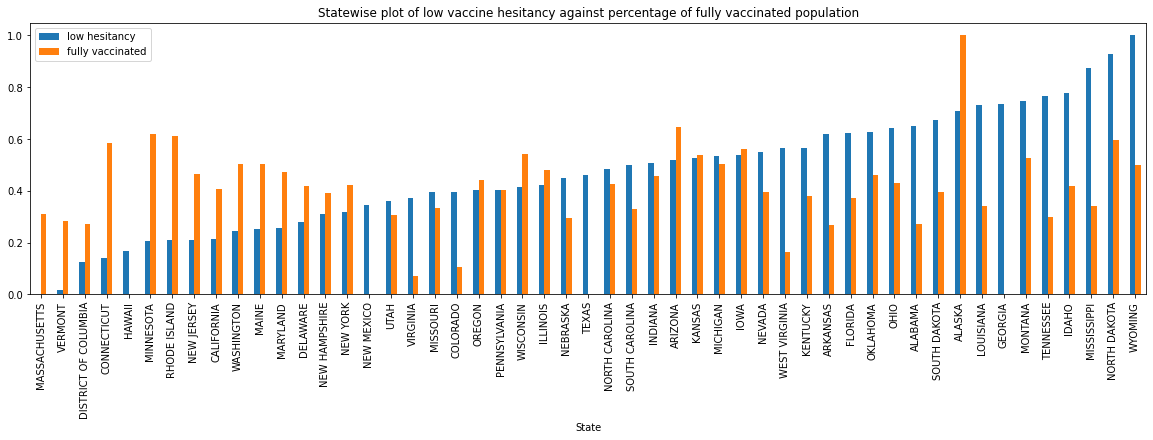

In [8]:
plot_title = "Statewise plot of low vaccine hesitancy against percentage of fully vaccinated population"
cdc_data_plot(cdc_statewise, 'low hesitancy', plot_title)

Estimated strongly hesitant vs percentage of  fully vaccinated people per state:

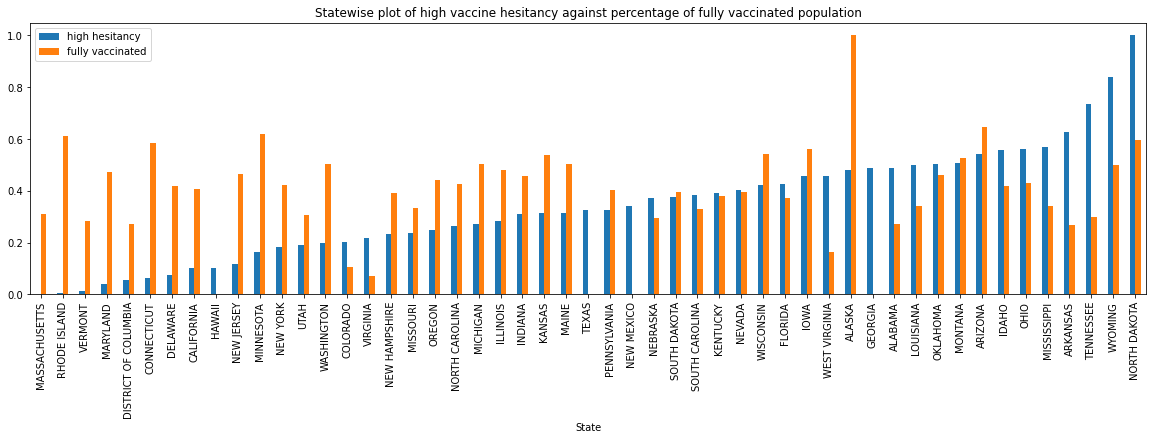

In [9]:
plot_title = "Statewise plot of high vaccine hesitancy against percentage of fully vaccinated population"
cdc_data_plot(cdc_statewise, 'high hesitancy', plot_title)

Social Vulnerability Index (SVI) vs percentage of fully vaccinated people per state:

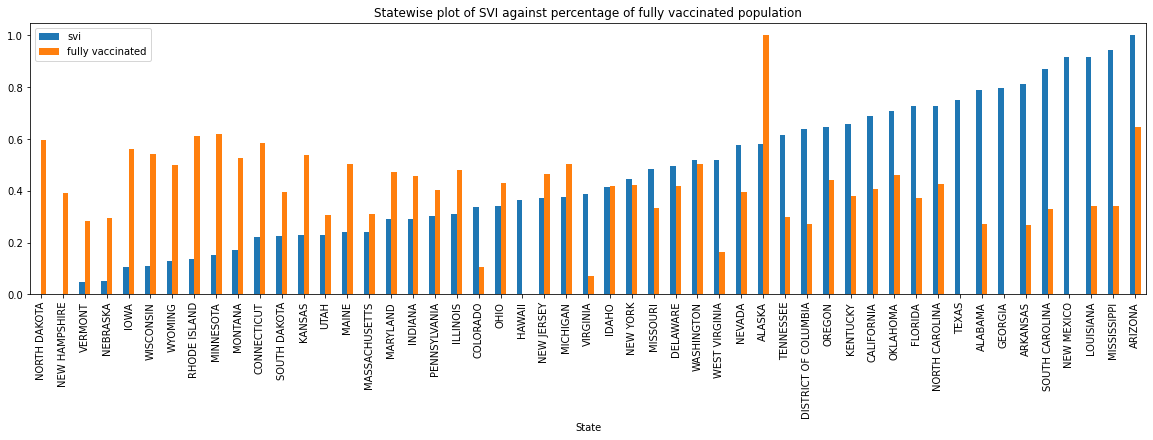

In [10]:
plot_title = "Statewise plot of SVI against percentage of fully vaccinated population"
cdc_data_plot(cdc_statewise, 'svi', plot_title)

COVID-19 Vaccine Coverage (CVAC) vs percentage of fully vaccinated people per state:

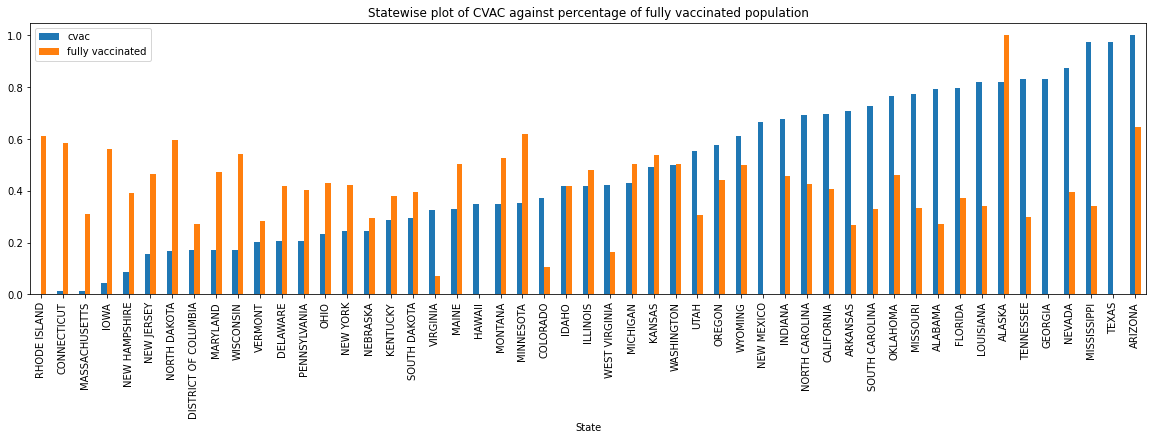

In [11]:
plot_title = "Statewise plot of CVAC against percentage of fully vaccinated population"
cdc_data_plot(cdc_statewise, 'cvac', plot_title)

Percentage of people vaccinated per state:

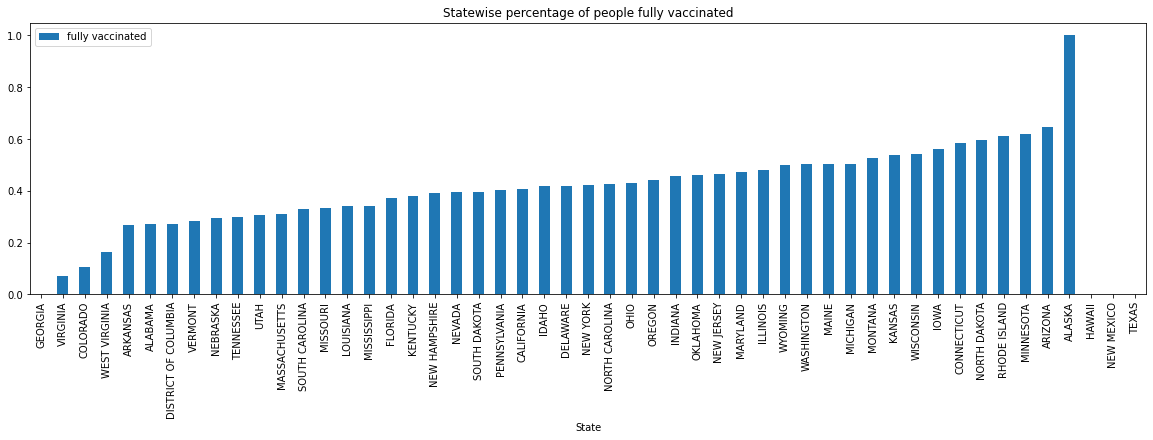

In [12]:
plot_title = "Statewise percentage of people fully vaccinated"
cdc_statewise[['fully vaccinated']].sort_values('fully vaccinated').plot(title = plot_title, kind = 'bar', figsize=(20,5))

# Time series plot for COVID-19 cases in India and the US:

Importing the world COVID-19 daily cases data:

In [13]:
data = pd.read_csv("/content/drive/MyDrive/PR_finals/worldometer_coronavirus_daily_data.csv")
# please comment the above line and uncomment the following line before running
#data = pd.read_csv("worldometer_coronavirus_daily_data.csv")

In [14]:
def covid_data_prep(df: pd.DataFrame, country: str) -> pd.DataFrame:
  """
  The function processes the data for a given country for further analysis
  :param df: world daily covid cases data
  :param country: country for which data needs to be processed
  """
  cases = df[df['country']==country][['date','country','cumulative_total_cases','daily_new_cases']]
  cases['month'] = pd.DatetimeIndex(cases['date']).month
  cases['year'] = pd.DatetimeIndex(cases['date']).year
  cases = cases.reset_index()
  cases.drop('index', axis=1, inplace=True)
  cases.drop('cumulative_total_cases', axis=1, inplace=True)

  # grouping the dataframe by month-year
  cases_monthwise = cases.groupby(['month','year']).sum().reset_index()
  cases_monthwise['month_year'] =  cases_monthwise['year'].apply(str) + '-' + cases_monthwise['month'].apply(str)
  cases_monthwise.sort_values(by=['year', 'month'], ascending = True, inplace = True)

  return cases_monthwise

In [15]:
cases_monthwise_india = covid_data_prep(data, 'India')
cases_monthwise_india.head()

,month,year,daily_new_cases,month_year
2,2,2020,0.0,2020-2
5,3,2020,1394.0,2020-3
8,4,2020,33466.0,2020-4
10,5,2020,155746.0,2020-5
12,6,2020,395183.0,2020-6


In [16]:
cases_monthwise_usa = covid_data_prep(data, 'USA')
cases_monthwise_usa.head()

,month,year,daily_new_cases,month_year
2,2,2020,53.0,2020-2
5,3,2020,210536.0,2020-3
8,4,2020,919272.0,2020-4
10,5,2020,758696.0,2020-5
12,6,2020,905280.0,2020-6


In [17]:
def covid_data_plot(df1: pd.DataFrame, df2: pd.DataFrame, country1: str, country2: str) -> None:
  """
  The function takes dataframes for two countries and creates a time series plot
  of the COVID-19 cases in those countries
  :param df1: processed data for country1
  :param df2: processed data for country2
  """
  # merging both the dataframes
  covid_cases = pd.merge(left = df1, right = df2, 
                       how = 'inner', left_on = 'month_year', right_on = 'month_year')
  
  # renaming the columns
  covid_cases = covid_cases.rename(columns = {'daily_new_cases_x':'cases_'+country1, 'daily_new_cases_y':'cases_'+country2})
  covid_cases.drop(['month_y', 'year_y'], axis=1, inplace=True)

  # scaling the data
  covid_cases['cases_'+country1] = (covid_cases['cases_'+country1] - covid_cases['cases_'+country1].min())/(covid_cases['cases_'+country1].max() - covid_cases['cases_'+country1].min())
  covid_cases['cases_'+country2] = (covid_cases['cases_'+country2] - covid_cases['cases_'+country2].min())/(covid_cases['cases_'+country2].max() - covid_cases['cases_'+country2].min())

  # plotting the dataframe
  plot_title = "Monthly COVID-19 Cases"

  x = 'month_year'
  y = ['cases_'+country1, 'cases_'+country2]

  covid_cases.plot(x, y, figsize=(20,5))
  plt.title(plot_title)
  plt.xlabel('month-year')
  plt.ylabel('no. of cases')

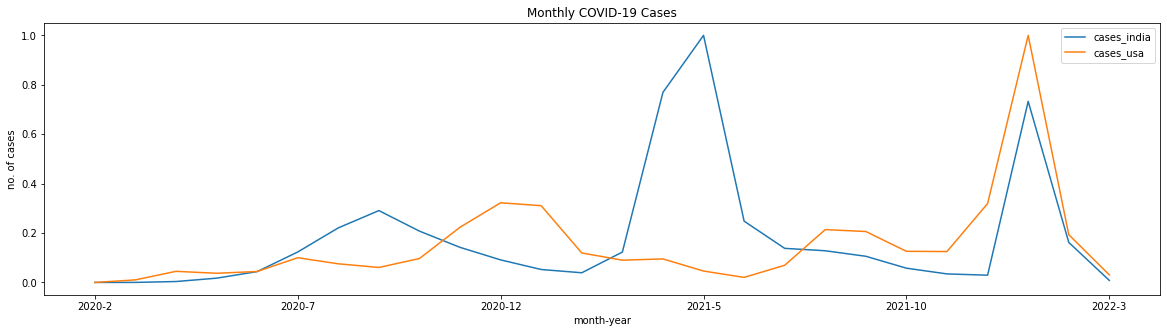

In [18]:
covid_data_plot(cases_monthwise_india, cases_monthwise_usa, 'india', 'usa')

# Time series plot for vaccine doses administered in India and the US:

Importing the dataset:

In [19]:
india_col = ['Updated On', 'Total Doses Administered', 'Male (Individuals Vaccinated)', 'Female (Individuals Vaccinated)', 'Transgender (Individuals Vaccinated)']
india_vax = pd.read_csv("/content/drive/MyDrive/PR_finals/cowin_vaccine_data_statewise.csv", usecols = india_col)
# please comment the above line and uncomment the following line before running
#india_vax = pd.read_csv("cowin_vaccine_data_statewise.csv", usecols = india_col)


usa_col = ['Date', 'Total Doses Administered Daily']
usa_vax = pd.read_csv("/content/drive/MyDrive/PR_finals/trends_in_number_of_covid19_vaccinations_in_the_us.csv", usecols = usa_col)
# please comment the above line and uncomment the following line before running
#usa_vax = pd.read_csv("trends_in_number_of_covid19_vaccinations_in_the_us.csv", usecols = usa_col)

In [20]:
def vaccine_data_prep(df: pd.DataFrame, country: str) -> pd.DataFrame:
  """
  The function takes vaccination data and processes it for further analysis.
  :param df: vaccination dataset
  :param country: country name
  """
  if country == 'India':
    df['month'] = pd.DatetimeIndex(df['Updated On']).month
    df['year'] = pd.DatetimeIndex(df['Updated On']).year
  else:
    df['month'] = pd.DatetimeIndex(df['Date']).month
    df['year'] = pd.DatetimeIndex(df['Date']).year

  df_monthwise = df.groupby(['month','year']).sum().reset_index()
  df_monthwise['month_year'] =  df_monthwise['year'].apply(str) + '-' + df_monthwise['month'].apply(str)

  return df_monthwise

In [21]:
india_monthwise = vaccine_data_prep(india_vax, 'India')

In [22]:
usa_monthwise = vaccine_data_prep(usa_vax, 'USA')

In [23]:
india_monthwise.head()

,month,year,Total Doses Administered,Male (Individuals Vaccinated),Female (Individuals Vaccinated),Transgender (Individuals Vaccinated),month_year
0,1,2021,3.865919e+09,4.024820e+08,3.726244e+08,108286.0,2021-1
1,2,2021,4.222649e+09,5.551354e+08,5.037422e+08,143577.0,2021-2
2,3,2021,5.687052e+09,1.209493e+09,1.058344e+09,270630.0,2021-3
3,4,2021,8.697618e+09,2.515578e+09,2.298128e+09,621472.0,2021-4
4,5,2021,1.135651e+10,3.469072e+09,3.074867e+09,961420.0,2021-5


In [24]:
usa_monthwise.head()

,month,year,Total Doses Administered Daily,month_year
0,1,2021,32129505,2021-1
1,1,2022,28100892,2022-1
2,2,2021,49992053,2021-2
3,2,2022,10914732,2022-2
4,3,2021,84217699,2021-3


In [25]:
def vaccine_data_plot(df1: pd.DataFrame, df2: pd.DataFrame, country1: str, country2: str) -> None:
  """
  The function creates a plot for doses adminsitered for given two countries.
  :param df1: dataframe of country1
  :param df2: dataframe of country2
  """
  # merge the dataframes
  monthly_vax = pd.merge(left = df1, right = df2, 
                       how = 'inner', left_on = 'month_year', right_on = 'month_year')
  
  # drop and rename columns
  monthly_vax = monthly_vax.rename(columns = {'Total Doses Administered':'doses_'+country1, 'Total Doses Administered Daily':'doses_'+country2})
  monthly_vax.drop(['month_y', 'year_y'], axis=1, inplace=True)

  # scaling the data
  monthly_vax['doses_'+country1] = (monthly_vax['doses_'+country1] - monthly_vax['doses_'+country1].min())/(monthly_vax['doses_'+country1].max() - monthly_vax['doses_'+country1].min())
  monthly_vax['doses_'+country2] = (monthly_vax['doses_'+country2] - monthly_vax['doses_'+country2].min())/(monthly_vax['doses_'+country2].max() - monthly_vax['doses_'+country2].min())

  # plot the dataframe
  plot_title = "Monthly Doses Administered"

  x = 'month_year'
  y = ['doses_'+country1, 'doses_'+country2]

  monthly_vax.plot(x, y, figsize=(20,5))
  plt.title(plot_title)
  plt.xlabel('month-year')
  plt.ylabel('no. of doses')


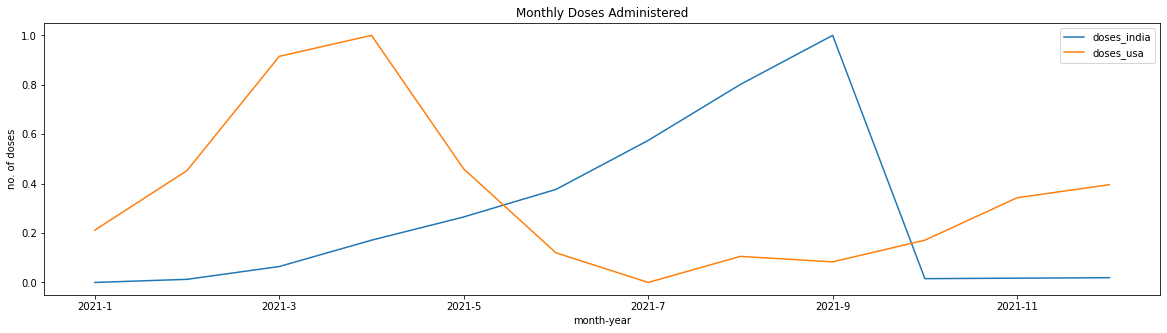

In [26]:
vaccine_data_plot(india_monthwise, usa_monthwise, 'india', 'usa')

# Vaccination trends of males, females and transgender people in India:


In [27]:
def vaccine_gender_plot(df: pd.DataFrame) -> None:
  """
  The function creates a plot for genderwise COVID-19 doses adminsitered in India
  :param df: vaccinationn data of India
  """
  # scaling the data
  df['Male (Individuals Vaccinated)'] = ((df['Male (Individuals Vaccinated)'] - df['Male (Individuals Vaccinated)'].min())
                                                /(df['Male (Individuals Vaccinated)'].max() - df['Male (Individuals Vaccinated)'].min())).round(2)
                                                
  df['Female (Individuals Vaccinated)'] = ((df['Female (Individuals Vaccinated)'] - df['Female (Individuals Vaccinated)'].min())
                                                /(df['Female (Individuals Vaccinated)'].max() - df['Female (Individuals Vaccinated)'].min())).round(2)

  df['Transgender (Individuals Vaccinated)'] = ((df['Transgender (Individuals Vaccinated)'] - df['Transgender (Individuals Vaccinated)'].min())
                                                /(df['Transgender (Individuals Vaccinated)'].max() - df['Transgender (Individuals Vaccinated)'].min())).round(2)

  # plot male/female/trans people vaccine uptake trends in india
  plot_title = "Vaccination trends of males, females, and transgender people in India"
  x = "month_year"
  y = ["Male (Individuals Vaccinated)", "Female (Individuals Vaccinated)", "Transgender (Individuals Vaccinated)"]

  df.plot(x, y, figsize=(20,5))
  plt.title(plot_title)
  plt.xlabel('month-year')
  plt.ylabel('no. of individuals')


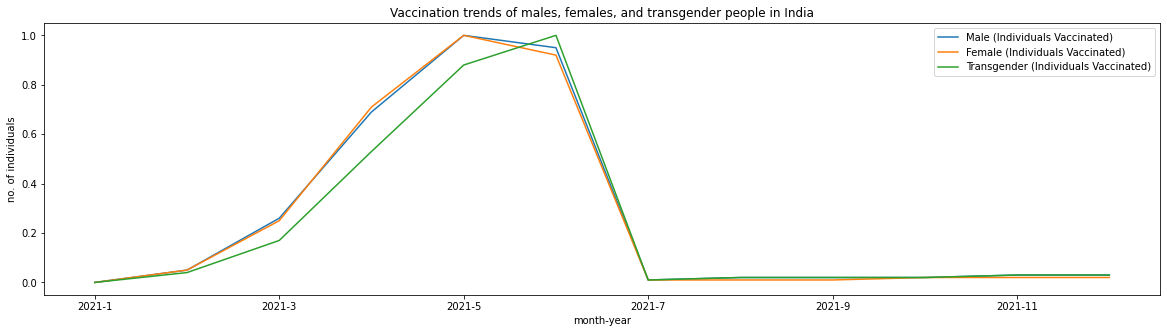

In [28]:
vaccine_gender_plot(india_monthwise)